# From Classical to Statistical Mechanics

-----------------------

### Molecular Dynamics of Hard Disk

* Direct Disc Box

In [1]:
import random, math

N = 4
sigma = 0.2
condition = False
while condition == False:
    L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
    for k in range(1, N):
        a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
        min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L) 
        if min_dist < 2.0 * sigma: 
            condition = False
            break
        else:
            L.append(a)
            condition = True
print L

[(0.7040822912665547, 0.2838326710047917), (0.39342373803132735, 0.7421281133983488), (0.22142950612928214, 0.3458410218455974), (0.7925829007636611, 0.7013410752456171)]


* Direct Disk Box Multirun

In [3]:
import random, math

def direct_disks_box(N, sigma):
    condition = False
    while condition == False:
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return L

N = 4
sigma = 0.2
n_runs = 10
for run in range(n_runs):
    print run, direct_disks_box(N, sigma)


0 [(0.751356313701969, 0.7908289343521684), (0.24313895825655835, 0.7973141414323697), (0.7507021517199071, 0.2714537639453098), (0.3426034108818664, 0.25674882938107063)]
1 [(0.7001130563019435, 0.712536202933747), (0.7789122711097405, 0.21613491258078213), (0.26983653980009353, 0.2199783600278326), (0.25072808927037593, 0.6851623784867935)]
2 [(0.27105063881736857, 0.6886358310439302), (0.7644440210934729, 0.284338623092072), (0.7010507662892869, 0.6836895516220605), (0.26760130925261805, 0.2011960174940446)]
3 [(0.7117322082996034, 0.7923158146795577), (0.20576363915920695, 0.33938157321671625), (0.6867409813215277, 0.3649824434229453), (0.2923911189377729, 0.7825731272388934)]
4 [(0.6574676789386877, 0.6868976023198012), (0.2380039193149221, 0.21289805532217043), (0.7500703097734738, 0.2596580338864641), (0.2526218011018484, 0.6277752777754828)]
5 [(0.7644607478477052, 0.7887798072013239), (0.3913939422967541, 0.6150405110722064), (0.791845121739368, 0.37567457535107485), (0.276900

* Direct Disk Box Movie

In [6]:
%matplotlib inline

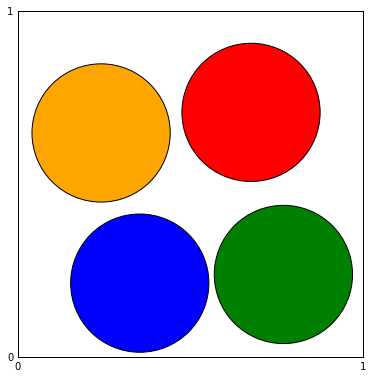

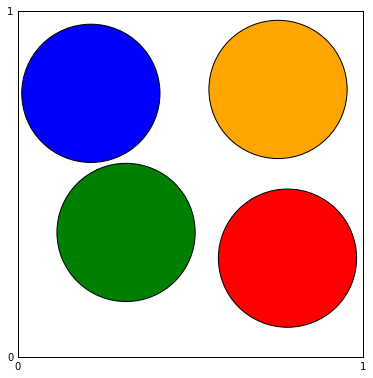

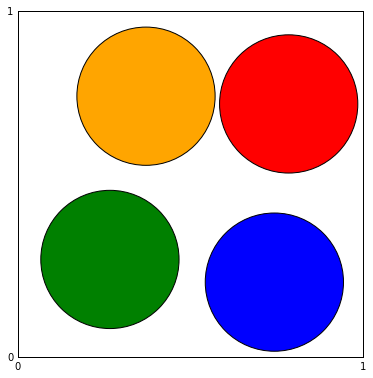

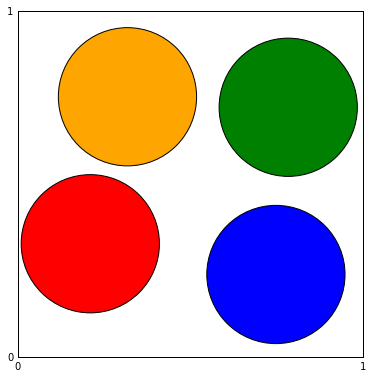

In [8]:
import random, math, os, pylab

output_dir = 'direct_disks_box_movie'

def direct_disks_box(N, sigma):
    condition = False
    while condition == False:
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return L

img = 0
if not os.path.exists(output_dir): os.makedirs(output_dir)
    
def snapshot(pos, colors):
    global img
    pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
    pylab.gcf().set_size_inches(6, 6)
    pylab.axis([0, 1, 0, 1])
    pylab.setp(pylab.gca(), xticks=[0, 1], yticks=[0, 1])
    for (x, y), c in zip(pos, colors):
        circle = pylab.Circle((x, y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
    #pylab.savefig(os.path.join(output_dir, '%d.png' % img), transparent=True)
    #pylab.close()
    pylab.show()
    img += 1

N = 4
colors = ['r', 'b', 'g', 'orange']
sigma = 0.2
n_runs = 4
for run in range(n_runs):
    pos = direct_disks_box(N, sigma)
    snapshot(pos, colors)


* Marcov Disk Box 

In [9]:
import random

L = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
sigma = 0.15
sigma_sq = sigma ** 2
delta = 0.1
n_steps = 1000
for steps in range(n_steps):
    a = random.choice(L)
    b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]
    min_dist = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 for c in L if c != a)
    box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    if not (box_cond or min_dist < 4.0 * sigma ** 2):
        a[:] = b
print L


[[0.45422994214163115, 0.3713914635605748], [0.7844238520523379, 0.4224856102112645], [0.15518208223429647, 0.5396419610447033], [0.7314291546873124, 0.842673491596291]]


* Marcove Disk Box Movie

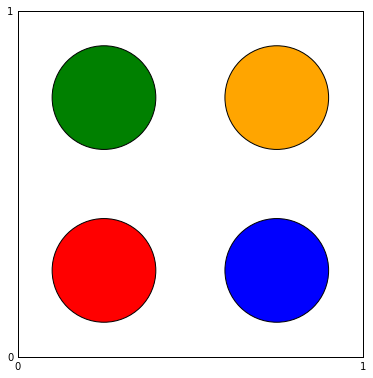

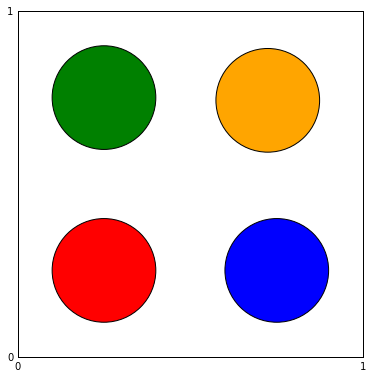

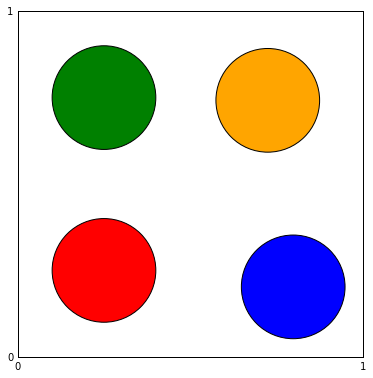

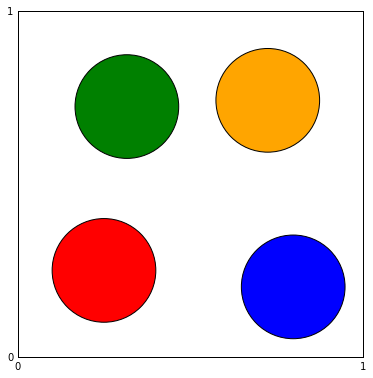

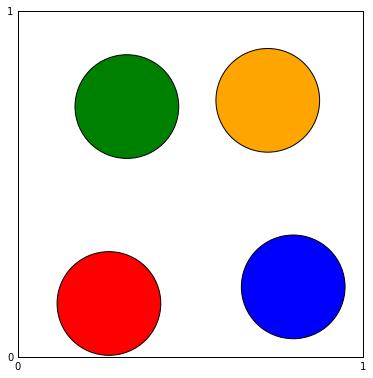

In [12]:
import random, os, pylab

output_dir = 'markov_disks_box_movie'

img = 0
if not os.path.exists(output_dir): os.makedirs(output_dir)
def snapshot(pos, colors):
    global img
    pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
    pylab.gcf().set_size_inches(6, 6)
    pylab.axis([0, 1, 0, 1])
    pylab.setp(pylab.gca(), xticks=[0, 1], yticks=[0, 1])
    for (x, y), c in zip(pos, colors):
        circle = pylab.Circle((x, y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
    #pylab.savefig(os.path.join(output_dir, '%d.png' % img), transparent=True)
    #pylab.close()
    pylab.show()
    img += 1

L = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
sigma = 0.15
sigma_sq = sigma ** 2
delta = 0.1
colors = ['r', 'b', 'g', 'orange']
n_steps = 5
for step in range(n_steps):
    snapshot(L, colors)
    a = random.choice(L)
    b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]
    min_dist = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 for c in L if c != a) 
    box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    if not (box_cond or min_dist < 4.0 * sigma ** 2):
        a[:] = b


* Event Disk Box 

In [13]:
import math

def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * ( del_x_sq - 4.0 * sigma **2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.15
t = 0.0
n_events = 10
for event in range(n_events):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l  in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    next_event = min(wall_times + pair_times)
    t += next_event
    for k, l in singles: pos[k][l] += vel[k][l] * next_event 
    if min(wall_times) < min(pair_times):
        collision_disk, direction = singles[wall_times.index(next_event)]
        vel[collision_disk][direction] *= -1.0
    else: 
        a, b = pairs[pair_times.index(next_event)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2): 
            vel[a][k] += e_perp[k] * scal 
            vel[b][k] -= e_perp[k] * scal 
    print 'event', event
    print 'time', t
    print 'pos', pos
    print 'vel', vel


event 0
time 0.128205128205
pos [[0.27692307692307694, 0.2653846153846154], [0.841025641025641, 0.27307692307692305], [0.2205128205128205, 0.6487179487179487], [0.85, 0.7650897435897436]]
vel [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [-0.78, 0.1177]]
event 1
time 0.140845070423
pos [[0.2795774647887324, 0.2669014084507042], [0.85, 0.2753521126760563], [0.21760563380281692, 0.6387323943661972], [0.8401408450704225, 0.7665774647887323]]
vel [[0.21, 0.12], [-0.71, 0.18], [-0.23, -0.79], [-0.78, 0.1177]]
event 2
time 0.241075114766
pos [[0.30062577410096064, 0.2789290137719775], [0.7788366685157999, 0.2933935206579662], [0.19455272360370984, 0.5595506593344816], [0.7619614104821464, 0.7783745410080145]]
vel [[0.4559640224861213, -0.5307103210067202], [-0.71, 0.18], [-0.4759640224861213, -0.13928967899327982], [-0.78, 0.1177]]
event 3
time 0.334680348563
pos [[0.34330639302873317, 0.229251750095734], [0.7123769525200255, 0.31024246274140194], [0.15, 0.5465124163668252], [0.68894932812059

* Event Disk Box Movie

time 0.02
time 0.04
time 0.06
time 0.08
time 0.1
Producing animation.gif using ImageMagick...


32512

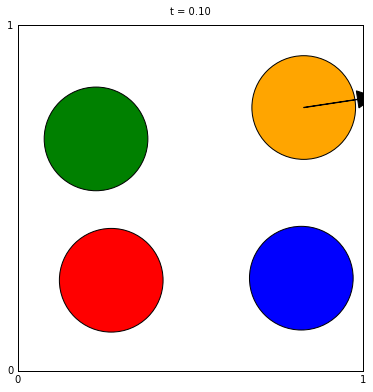

In [14]:
import os, math, pylab

output_dir = "event_disks_box_movie"
colors = ['r', 'b', 'g', 'orange']

def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * (del_x_sq - 4.0 * sigma ** 2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

def min_arg(l):
    return min(zip(l, range(len(l))))

def compute_next_event(pos, vel):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    return min_arg(wall_times + pair_times)

def compute_new_velocities(pos, vel, next_event_arg):
    if next_event_arg < len(singles):
        collision_disk, direction = singles[next_event_arg]
        vel[collision_disk][direction] *= -1.0
    else:
        a, b = pairs[next_event_arg - len(singles)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2):
            vel[a][k] += e_perp[k] * scal
            vel[b][k] -= e_perp[k] * scal

pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
pylab.gcf().set_size_inches(6, 6)
img = 0
if not os.path.exists(output_dir): os.makedirs(output_dir)
def snapshot(t, pos, vel, colors, arrow_scale=.2):
    global img
    pylab.cla()
    pylab.axis([0, 1, 0, 1])
    pylab.setp(pylab.gca(), xticks=[0, 1], yticks=[0, 1])
    for (x, y), (dx, dy), c in zip(pos, vel, colors):
        dx *= arrow_scale
        dy *= arrow_scale
        circle = pylab.Circle((x, y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
    pylab.arrow( x, y, dx, dy, fc="k", ec="k", head_width=0.05, head_length=0.05 )
    pylab.text(.5, 1.03, 't = %.2f' % t, ha='center')
    pylab.savefig(os.path.join(output_dir, '%d.png' % img))
    img += 1

pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.15
t = 0.0
dt = 0.02     # dt=0 corresponds to event-to-event animation
n_steps = 5
next_event, next_event_arg = compute_next_event(pos, vel)
snapshot(t, pos, vel, colors)
for step in range(n_steps):
    if dt:
        next_t = t + dt
    else:
        next_t = t + next_event
    while t + next_event <= next_t:
        t += next_event
        for k, l in singles: pos[k][l] += vel[k][l] * next_event
        compute_new_velocities(pos, vel, next_event_arg)
        next_event, next_event_arg = compute_next_event(pos, vel)
    remain_t = next_t - t
    for k, l in singles: pos[k][l] += vel[k][l] * remain_t
    t += remain_t
    next_event -= remain_t
    snapshot(t, pos, vel, colors)
    print 'time',t

print('Producing animation.gif using ImageMagick...')
os.system("convert -delay 1 -dispose Background +page " + str(output_dir)
          + "/*.png -loop 0 " + str(output_dir) + "/animation.gif")


## TUTORIAL

----------------------

* Direct Discrete 

In [15]:
import random

configurations = {(0, 3): 'a', (0, 4): 'b', (1, 4): 'c',
                  (3, 0): 'd', (4, 0): 'e', (4, 1): 'f'}
counts = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0}
n_runs = 10000
for run in range(n_runs):
    while True:
        red_rod = random.randint(0, 4)
        blue_rod = random.randint(0, 4)
        if abs(red_rod - blue_rod) > 2: break
    conf = configurations[(red_rod, blue_rod)]
    counts[conf] += 1
for conf in counts:
    print conf, counts[conf] / float(n_runs)


a 0.1606
c 0.1744
b 0.1651
e 0.1688
d 0.1666
f 0.1645


* Direct Disk Any

In [16]:
import random

configurations = {(0, 3): 'a', (0, 4): 'b', (1, 4): 'c', 
                  (3, 0): 'd', (4, 0): 'e', (4, 1): 'f'}
counts = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0}
n_runs = 10000
for i in range(n_runs):
    red_rod = random.randint(0, 3)
    if red_rod >= 2: red_rod += 1
    while True:
        blue_rod = random.randint(0, 4)
        if abs(red_rod - blue_rod) > 2: break
    conf = configurations[(red_rod, blue_rod)]  
    counts[conf] += 1
for conf in counts: 
    print conf, counts[conf] / float(n_runs)    


a 0.125
c 0.2535
b 0.1282
e 0.1236
d 0.2448
f 0.1249


* Direct Disk Slow

In [17]:
import random

N = 4
sigma = 0.2
pairs = [(i, j) for i in range(N - 1) for j in range(i + 1, N)]
while True:
    L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma)) for k in range(N)]
    if  min((L[i][0] - L[j][0]) ** 2 + (L[i][1] - L[j][1]) ** 2 for i, j in pairs) > 4.0 * sigma ** 2: 
        break
print L

[(0.21551840405127012, 0.6946062982572399), (0.7165001545926342, 0.7818232246535084), (0.23604717555981464, 0.20175467827936644), (0.7369665863408736, 0.22746836079162713)]


* Direct Disk Multy Run

In [19]:
import random, math

def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(x[1] - y[1]) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2)
    
def direct_disks(N, sigma):
    n_iter = 0
    condition = False
    while condition == False:
        n_iter += 1
        L = [(random.random(), random.random())]
        for k in range(1, N):
            a = (random.random(), random.random())
            min_dist = min(dist(a, b) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return n_iter, L

N = 16
eta = 0.26
sigma = math.sqrt(eta / N / math.pi)
n_runs = 3
print 'Note that this program might take a while!'
for run in range(n_runs):
    iterations, config =  direct_disks(N, sigma)
    print 'run',run
    print iterations - 1, 'tabula rasa wipe-outs before producing the following configuration'
    print config
    print


Note that this program might take a while!
run 0
31605 tabula rasa wipe-outs before producing the following configuration
[(0.194889385979373, 0.39881902164303773), (0.2422007285687603, 0.7366374459128198), (0.35318282136090084, 0.5379884266619391), (0.5010455241583772, 0.4351768931362382), (0.6651055976532885, 0.4638578576617244), (0.9930426536472047, 0.4807095480519158), (0.17504742382982807, 0.10058142284791849), (0.055224973814334, 0.8728958780045791), (0.8132249354226135, 0.976570654646086), (0.6479652398072496, 0.05414388830919192), (0.01589908172878507, 0.2662968574596569), (0.6838513187488974, 0.19681773278090198), (0.9368744315347303, 0.685040874598465), (0.6148616792388668, 0.8576188696976752), (0.38396787071111793, 0.9725957113091733), (0.7881129382924161, 0.6785640836009906)]

run 1
15954 tabula rasa wipe-outs before producing the following configuration
[(0.4314049494382257, 0.6098720262344923), (0.017147469087248735, 0.04156012115642216), (0.36056156266147066, 0.848096088

* Direct Disk Multirun Movie

run 0
131155 tabula rasa wipe-outs before producing the following configuration
[(0.37751482770484623, 0.09826945819054489), (0.9042803838379859, 0.9899090068252806), (0.6599172275086992, 0.13514484949079997), (0.3069710953434255, 0.9492470432337818), (0.812561619375132, 0.40987724481013443), (0.08056164082415274, 0.9742623716403652), (0.17768767689521647, 0.36507790353189173), (0.7472387120689303, 0.6515254273168409), (0.4823057447690441, 0.966105763619611), (0.8439633788642334, 0.22358147605283396), (0.2773016015309173, 0.5814435581054298), (0.9889618140696187, 0.1438503101976658), (0.14326378711556154, 0.7477166886625792), (0.9583168761426655, 0.7453819253487872), (0.6958450554989644, 0.833667878473739), (0.03867224868418362, 0.45119012797766134)]



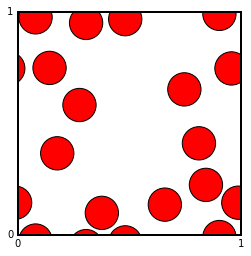

run 1
151638 tabula rasa wipe-outs before producing the following configuration
[(0.06663014301020642, 0.031012554991157848), (0.964969664612716, 0.3118932568228565), (0.5264170452307265, 0.21975704506305127), (0.6756537746594122, 0.4041417433687611), (0.29476393772557075, 0.48140722828952787), (0.04654217216799017, 0.7996306905990145), (0.3608861327100239, 0.977618260879936), (0.6681113244137261, 0.6090611715960019), (0.12110126452367742, 0.22017356776253005), (0.8799686683355867, 0.6697177890430397), (0.5562558075938777, 0.010767930248896995), (0.47925142273497534, 0.6082991245007762), (0.8951272729365909, 0.868123465117719), (0.7441835171796956, 0.20179368489656824), (0.29000010977447666, 0.2067871038708291), (0.10233368264294007, 0.54745216577934)]



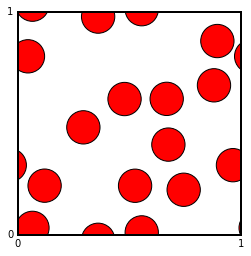

run 2
40762 tabula rasa wipe-outs before producing the following configuration
[(0.3260865108779446, 0.3148486233563623), (0.17803174008736766, 0.871851631193864), (0.8642532654525102, 0.08718797467709805), (0.4535702388344728, 0.1972919882412194), (0.07246890805097073, 0.5355473801360247), (0.3167501018585722, 0.7681798596800488), (0.671929948288115, 0.08427537345070424), (0.8644955101334825, 0.41613572562559775), (0.9021147383601401, 0.23196647448286645), (0.1780243297944175, 0.07236748708775964), (0.9632055830413773, 0.920103872618813), (0.90024339362327, 0.6917231317784356), (0.6185771240906243, 0.5665103724765188), (0.6793688570302557, 0.7331932103505989), (0.5239912054538993, 0.9604405020823239), (0.07573035699193864, 0.21241500055444595)]



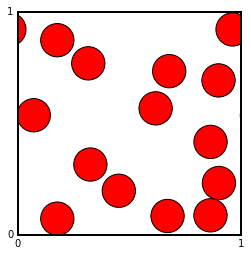

run 3
1734 tabula rasa wipe-outs before producing the following configuration
[(0.2969684910325956, 0.7370119193950877), (0.9483844593486023, 0.6061018303643925), (0.1845637095681364, 0.11755918194051718), (0.9224199053841572, 0.869609425930199), (0.8519294493087842, 0.10902428512765583), (0.5101493777903654, 0.2872301781881832), (0.9875828733480082, 0.04180666162781088), (0.6831331006373645, 0.8465660961464345), (0.6993010504747139, 0.6378153765843604), (0.5672049317965627, 0.5350506678949322), (0.36850545523016154, 0.4642146828212168), (0.39988375455206737, 0.862433823125543), (0.7437881541243506, 0.3123760520673676), (0.6030356510965643, 0.10933875059004539), (0.9864351374492086, 0.2778717125787915), (0.16589795291507614, 0.5442153195383387)]



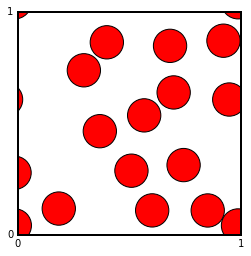

In [21]:
import random, math, pylab, os

def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(x[1] - y[1]) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2)
    
def direct_disks(N, sigma):
    n_iter = 0
    condition = False
    while condition == False:
        n_iter += 1
        L = [(random.random(), random.random())]
        for k in range(1, N):
            a = (random.random(), random.random())
            min_dist = min(dist(a, b) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return n_iter, L

img = 0
output_dir = 'direct_disks_multirun_movie'
if not os.path.exists(output_dir): os.makedirs(output_dir)
def snapshot(pos, colors, border_color = 'k'):
    global img
    pylab.figure()
    pylab.axis([0, 1, 0, 1])
    [i.set_linewidth(2) for i in pylab.gca().spines.itervalues()]
    [i.set_color(border_color) for i in pylab.gca().spines.itervalues()]
    pylab.setp(pylab.gca(), xticks = [0, 1], yticks = [0, 1], aspect = 'equal')
    for (x, y), c in zip(pos, colors):
        circle = pylab.Circle((x, y), radius = sigma, fc = c)
        pylab.gca().add_patch(circle)
    #pylab.savefig(output_dir+'/snapshot_%03i.png'%img)
    #pylab.close()
    pylab.show()
    img += 1

def periodicize(config):
    images = [-1.0, 0.0, 1.0]
    return [(x + dx, y + dy) for (x,y) in config for dx in images for dy in images]

N = 16
eta = 0.28
sigma = math.sqrt(eta / N / math.pi)
n_runs = 4
colors = ['r' for i in range(8 * N)]
for run in range(n_runs):
    iterations, config =  direct_disks(N, sigma)
    print 'run',run
    print iterations - 1, 'tabula rasa wipe-outs before producing the following configuration'
    print config
    print
    config_per = periodicize(config)
    snapshot(config_per, colors, border_color = 'k')


* Random Sequential Discrete

In [22]:
import random

configurations = {(0, 3): 'a', (0, 4): 'b', (1, 4): 'c', 
                  (3, 0): 'd', (4, 0): 'e', (4, 1): 'f'}
counts = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0}
n_runs = 10000
for i in range(n_runs):
    red_rod = random.randint(0, 3)
    if red_rod >= 2: red_rod += 1
    while True:
        blue_rod = random.randint(0, 4)
        if abs(red_rod - blue_rod) > 2: break
    conf = configurations[(red_rod, blue_rod)]  
    counts[conf] += 1
for conf in counts: 
    print conf, counts[conf] / float(n_runs)    


a 0.1281
c 0.2548
b 0.122
e 0.1238
d 0.2474
f 0.1239


* Random Sequential Discrete Movie

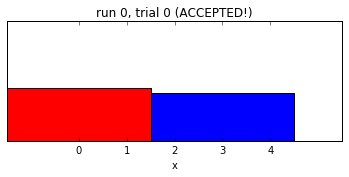

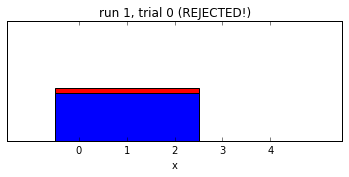

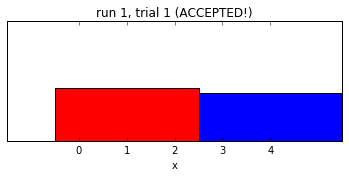

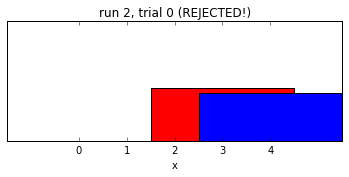

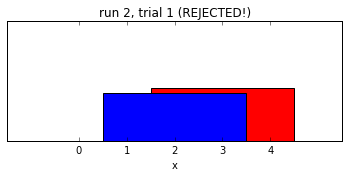

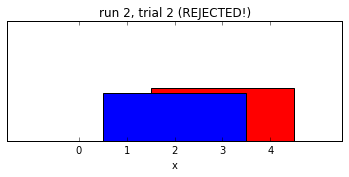

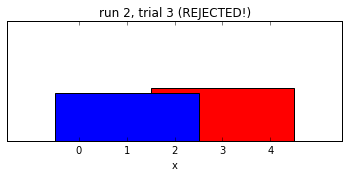

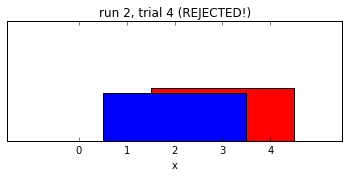

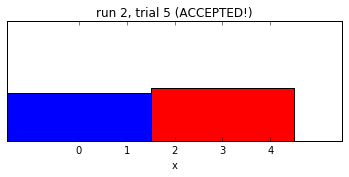

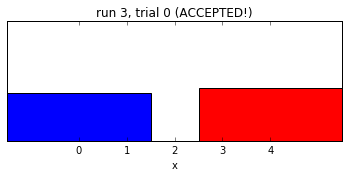

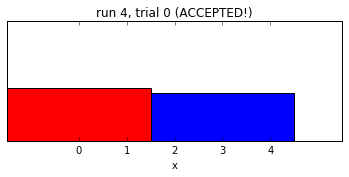

a 0.4
c 0.2
b 0.0
e 0.2
d 0.2
f 0.0


In [24]:
import random, pylab, os

output_dir = 'random_sequential_discrete_movie'
if not os.path.exists(output_dir): os.makedirs(output_dir)
def show_rods(red_rod, blue_rod, run, trial, frame):
    fig, ax = pylab.subplots()
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_yticks([])
    height = 1.0
    redrect = pylab.Rectangle((red_rod - 1.5, 0.0), 3.0, 1.1 * height,  fc = 'r')
    pylab.gca().add_patch(redrect)
    bluerect = pylab.Rectangle((blue_rod-1.5,0.0), 3.0, height,  fc = 'b')
    pylab.gca().add_patch(bluerect)
    pylab.axis('scaled')
    pylab.axis([-1.5, 5.5, 0.0, 2.5*height])
    pylab.xlabel("x")
    if abs(red_rod - blue_rod) > 2:
        pylab.title('run %d, trial %d (ACCEPTED!)' % (run, trial))
    else:
        pylab.title('run %d, trial %d (REJECTED!)' % (run, trial))
    #pylab.savefig(output_dir+'/random_sequential_discrete_frame%d.png' % (frame))
    pylab.show()

configurations = {(0, 3): 'a', (0, 4): 'b', (1, 4): 'c', 
                  (3, 0): 'd', (4, 0): 'e', (4, 1): 'f'}
counts = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0}
n_runs = 5
frame = 0
trial = 0
for run in range(n_runs):
    red_rod = random.randint(0, 3)
    if red_rod >= 2: red_rod += 1
    trial = 0
    while True:
        blue_rod = random.randint(0, 4)
        show_rods(red_rod, blue_rod, run, trial, frame)
        trial += 1
        frame += 1
        if abs(red_rod - blue_rod) > 2: break
    conf = configurations[(red_rod, blue_rod)]
    counts[conf] += 1
for conf in counts:
    print conf, counts[conf] / float(n_runs)
